<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/Cosine_and_exponential_based_on_EulerIdentity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Cosine and Exponential Funcitons</h1></b>

Dr. Bingsen Wang

7/7/2024
</center>

#Euler Identity

The Euler's identity is described by
$$e^{j\theta} = \cos\theta + j\sin\theta \tag{1}$$

Since the consine function is even and the sine function is odd, it follows that
$$e^{-j\theta} = \cos(-\theta) + j\sin(-\theta) =\cos\theta - j\sin\theta \tag{2}$$

#Consine and Expoential

The sum of (1) and (2) yields.
$$e^{j\theta} + e^{-j\theta} = 2\cos\theta\tag{3}$$

Hence,
$$\cos\theta= \frac{e^{j\theta} + e^{-j\theta}}2\tag{4}$$

#Python Code
The Python code illustrates $\cos\theta= \frac{e^{j\theta} + e^{-j\theta}}2$.

0
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
0


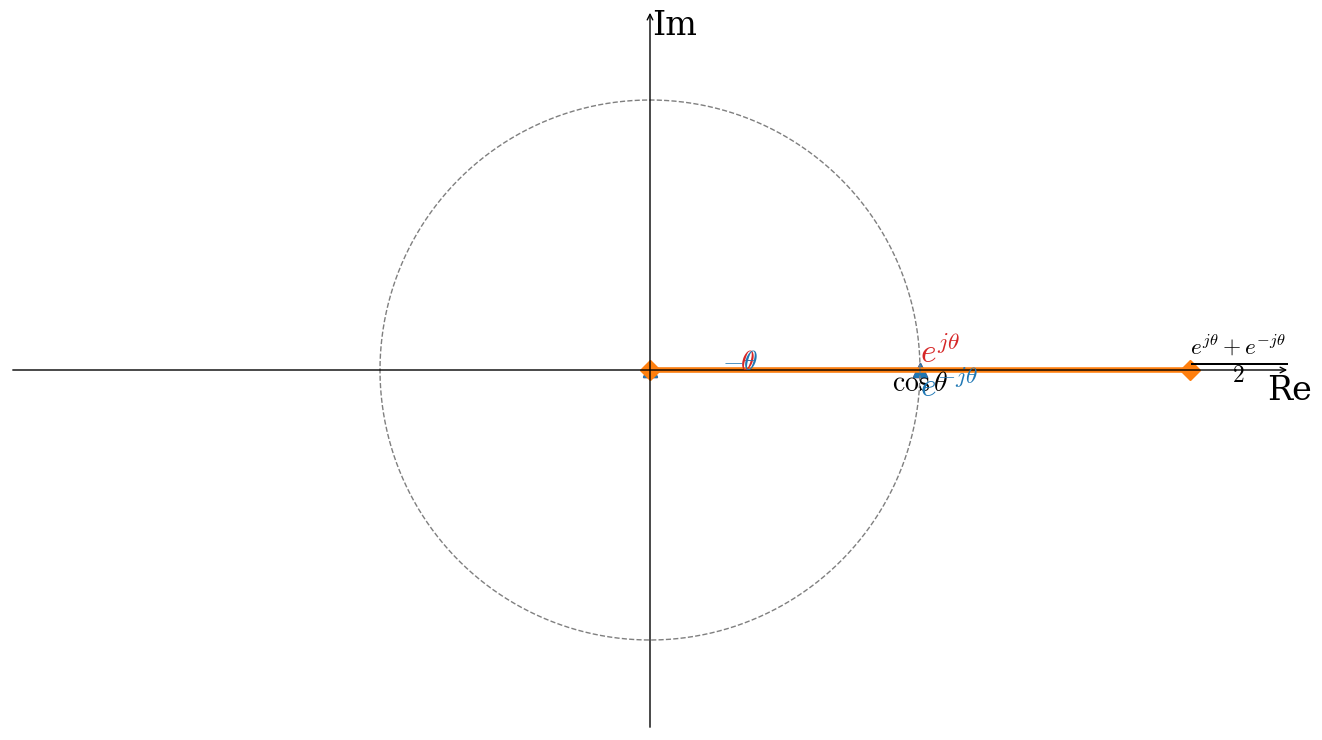

In [62]:
import matplotlib
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

#parameters
Nf = 600
theta=linspace(0,2*pi,Nf)
z = 1.5*exp(1j*theta)
ar =16/9 #aspect ratio of the plotting area: width over height
fig = plt.figure(figsize=(16,9))
fig.tight_layout()
ax=fig.add_axes((.1,.1,.8,.8),xlim=[-2*ar,2*ar], ylim=[-2,2],fc='none') #no fc
ax.axis('off') #turn off axis frames
ax.annotate("", (2*ar, 0), (-2*ar, 0),arrowprops={'arrowstyle':"->"}) #x-axis
ax.annotate("", (0,2), (0,-2),arrowprops={'arrowstyle':"->"}) #y-axis
ax.text(2*ar,-.03,'Re',size=24,va='top',ha='center') #x-axis label
ax.text(0.01,2,'Im',size=24,va='top') #y label
tcos = ax.text(z[0].real,0,r'$\cos\theta$', size = 20,va='top',ha='center',color='k')
tejtheta = ax.text(z[0].real,z[0].imag,r'$e^{j\theta}$', size = 24,color='tab:red')
tejtheta1 = ax.text(2*z[0].real,0,r'$\frac{e^{j\theta}+e^{-j\theta}}{2}$', size = 24,color='k')
tejthetaminus = ax.text(z[0].real,z[0].imag,r'$e^{-j\theta}$', size = 24,color='tab:blue')
ttheta = ax.text(0.5*cos(theta[0]*.5),0.5*sin(theta[0]*.5),r'$\theta$', size = 20, color ='tab:red')
tthetaminus = ax.text(0.4*cos(theta[0]*.5),0.4*sin(-theta[0]*.5),r'$-\theta$', size = 20, color ='tab:blue')

lines = [] #array containing all the line segments
lines.append(ax.plot([], [], '-^',markersize=10, lw=3, color='tab:red')[0]) #e^(j theta)
lines.append(ax.plot([], [], '--', lw=2, color='k')[0]) #real
lines.append(ax.plot([], [], '-^',markersize=10, lw=3, color='tab:blue')[0]) #e^(-j theta)
lines.append(ax.plot([], [], '--', lw=1, color='tab:red')[0]) #parallel e^{j theta}
lines.append(ax.plot([], [], '--', lw=1, color='tab:blue')[0]) #parallel e^{-j theta}
lines.append(ax.plot([], [], lw=1, color='tab:red')[0]) #arc for theta
lines.append(ax.plot([], [], lw=1, color='tab:blue')[0]) #arc for -theta
lines.append(ax.plot([], [], '-D',markersize=10, lw=4, color='tab:orange')[0]) #e^(j theta)+e^(-j theta)


# animation function. This is called sequentially
def animate(i):
  # i=170
  if i%10==0:
    print(i)
  lines[0].set_data([0,z[i].real],[0,z[i].imag]) #e^{jtheta}
  lines[1].set_data([z[i].real,z[i].real],[0,z[i].imag])
  lines[2].set_data([0,z[i].real],[0,-z[i].imag])#e^{-jtheta}
  lines[3].set_data([z[i].real,2*z[i].real],[-z[i].imag,0]) #parallel e^{jtheta}
  lines[4].set_data([z[i].real,2*z[i].real],[z[i].imag,0]) #parallel e^{-jtheta}
  lines[5].set_data(z[:i].real*.3,z[:i].imag*.3) #parallel e^{-jtheta}
  lines[6].set_data(z[:i].real*.25,-z[:i].imag*.25) #parallel e^{-jtheta}
  lines[7].set_data([0,2*z[i].real],[0,0]) #e^{jtheta}+e^{-jtheta}
  tcos.set_position((z[i].real,0))
  tejtheta.set_position((z[i].real,z[i].imag))
  tejtheta1.set_position((2*z[i].real,0))
  tejthetaminus.set_position((z[i].real,-z[i].imag))
  if theta[i]<pi:
    tcos.set_va('top')
    tejtheta.set_va('bottom')
    tejthetaminus.set_va('top')
  else:
    tcos.set_va('bottom')
    tejtheta.set_va('top')
    tejthetaminus.set_va('top')
  if theta[i]<1.5*pi and theta[i]>0.5*pi:
    tejtheta.set_ha('right')
    tejtheta1.set_ha('right')
    tejthetaminus.set_ha('right')
  else:
    tejtheta.set_ha('left')
    tejtheta1.set_ha('left')
    tejthetaminus.set_ha('left')
  ttheta.set_position((0.5*cos(theta[i]/2),0.5*sin(theta[i]/2)))
  tthetaminus.set_position((0.4*cos(theta[i]/2),0.4*sin(-theta[i]/2)))
  return
ax.plot(z.real,z.imag,lw=1,ls='--',color='tab:grey')
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"EulerIdentityCosine.mp4"
writervideo = animation.FFMpegWriter(fps=40)
anim.save(fn, writer=writervideo,dpi = 200)


